# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Alan Ghani Haris
- **Email:** aghanih2.5@gmail.com / m008b4ky0314@bangkit.academy
- **ID Dicoding:** alangh

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah rental pada kondisi cuaca tertentu?
- Kapan jam yang memiliki jumlah rental terbanyak pada bulan terpadat?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Memuat day.csv

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat hour.csv

In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv memuat parameter yang hampir dengan hour.csv dengan perbedaan pada parameter hr(hour)
- day.csv menggunakan timeframe per 1 hari, sedangkan hour.csv menggunakan timefram per 1 jam

### Assessing Data

#### Check hour_df

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Check day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kesalahan tipe data untuk tanggal(dteday) day_df dan hour_df
- tidak ditemukan duplikat dan missing values

### Cleaning Data

#### Mengubah tipe data dteday 

In [8]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- untuk menjawab pertanyaan pertama kita bisa mengelompokkan jumlah rental dengan kondisi cuaca
- untuk melihat jumlah paling banyak setiap bulannya kita bisa mengelompkkan berdsarkan bulan

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melihat parameter pada day_df

In [10]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Mengelompokkan jumlah rental pada cuaca tertentu setiap bulannya

In [11]:
day_df.groupby([pd.Grouper(key='dteday', freq='M'), day_df.weathersit]).cnt.sum()

C:\Users\Alan\AppData\Local\Temp\ipykernel_15916\1935234206.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  day_df.groupby([pd.Grouper(key='dteday', freq='M'), day_df.weathersit]).cnt.sum()


dteday      weathersit
2011-01-31  1              21004
            2              16679
            3                506
2011-02-28  1              35190
            2              13025
2011-03-31  1              39703
            2              22034
            3               2308
2011-04-30  1              52392
            2              41683
            3                795
2011-05-31  1              87599
            2              48222
2011-06-30  1             103863
            2              39649
2011-07-31  1             122825
            2              18516
2011-08-31  1             107467
            2              29224
2011-09-30  1              53506
            2              67364
            3               6548
2011-10-31  1              82959
            2              35085
            3               5467
2011-11-30  1              72751
            2              23227
            3               6189
2011-12-31  1              55808
            2       

#### Melihat parameter pada hour_df

In [12]:
hour_df.describe(include='all')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


#### Menentukan bulan dengan jumlah rental Terbanyak

In [13]:
hour_df.groupby([pd.Grouper(key='dteday', freq='M')]).cnt.sum().sort_values(ascending=False)

C:\Users\Alan\AppData\Local\Temp\ipykernel_15916\705013517.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hour_df.groupby([pd.Grouper(key='dteday', freq='M')]).cnt.sum().sort_values(ascending=False)


dteday
2012-09-30    218573
2012-08-31    214503
2012-07-31    203607
2012-06-30    202830
2012-10-31    198841
2012-05-31    195865
2012-04-30    174224
2012-03-31    164875
2012-11-30    152664
2011-06-30    143512
2011-07-31    141341
2011-08-31    136691
2011-05-31    135821
2011-09-30    127418
2012-12-31    123713
2011-10-31    123511
2012-02-29    103137
2011-11-30    102167
2012-01-31     96744
2011-04-30     94870
2011-12-31     87323
2011-03-31     64045
2011-02-28     48215
2011-01-31     38189
Name: cnt, dtype: int64

jumlah rental terbanyak ketika bulan september

#### Membuat filter pada bulan dengan jumlah rental terbanyak

In [14]:
start_date = '2012-09-1'
end_date = '2012-09-30'

filtered_hour_df = hour_df[(hour_df['dteday'] >= start_date) & (hour_df['dteday'] <= end_date)]
filtered_hour_df.describe()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,720.000000,720,720.000000,720.0,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,14851.500000,2012-09-15 12:00:00,3.266667,1.0,9.0,11.500000,0.033333,3.000000,0.633333,1.315278,0.620083,0.590053,0.645375,0.178901,60.802778,242.770833,303.573611
min,14492.000000,2012-09-01 00:00:00,3.000000,1.0,9.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.424200,0.280000,0.000000,0.000000,3.000000,3.000000
25%,14671.750000,2012-09-08 00:00:00,3.000000,1.0,9.0,5.750000,0.000000,1.000000,0.000000,1.000000,0.560000,0.515200,0.520000,0.104500,10.000000,63.000000,78.000000
50%,14851.500000,2012-09-15 12:00:00,3.000000,1.0,9.0,11.500000,0.000000,3.000000,1.000000,1.000000,0.620000,0.606100,0.670000,0.179100,35.000000,203.000000,256.500000
75%,15031.250000,2012-09-23 00:00:00,4.000000,1.0,9.0,17.250000,0.000000,5.000000,1.000000,2.000000,0.700000,0.636400,0.770000,0.253700,79.000000,356.000000,472.500000
max,15211.000000,2012-09-30 00:00:00,4.000000,1.0,9.0,23.000000,1.000000,6.000000,1.000000,3.000000,0.860000,0.787900,0.940000,0.641800,350.000000,886.000000,977.000000
std,207.990384,NaN,0.442524,0.0,0.0,6.926999,0.179630,2.083113,0.482229,0.581868,0.089390,0.080153,0.165403,0.114894,70.072901,208.260433,249.860596


#### Mengelompokkan berdasarkan jam

In [15]:
filtered_hour_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)


hr
17    22523
18    20943
8     15993
16    15269
19    15089
13    12978
12    12967
15    12389
14    12261
11    10813
20    10553
7     10297
9      9589
10     8651
21     7650
22     5757
23     3919
6      3673
0      2602
1      1558
2      1126
5      1049
3       619
4       305
Name: cnt, dtype: int64

**Insight:**
- setelah mengelompokkan berdsarakan bulan dan cuaca akan terlihat mana jumlah terbanyak pada cuaca tertentu
- dengan menentukan bulan dengan jumlah terbanyak kita bisa melihat kapan jam dengan pengguna rental terbanyak

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Menambah label untuk setiap kondisi cuaca

In [16]:
wheather_map = {1: "Clear", 2:"Misty", 3:"Light Rain"}
day_df["weathersit_label"] = day_df["weathersit"].map(wheather_map)

#### Membuat variabel baru untuk grouping plot

In [17]:
wheather_df = day_df.groupby([pd.Grouper(key='dteday', freq='M'), day_df.weathersit, day_df.weathersit_label]).cnt.sum()

C:\Users\Alan\AppData\Local\Temp\ipykernel_15916\1639280109.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  wheather_df = day_df.groupby([pd.Grouper(key='dteday', freq='M'), day_df.weathersit, day_df.weathersit_label]).cnt.sum()


#### Melakukan plotting Tabel Jumlah Rental pada Kondisi Cuaca Setiap bulannya

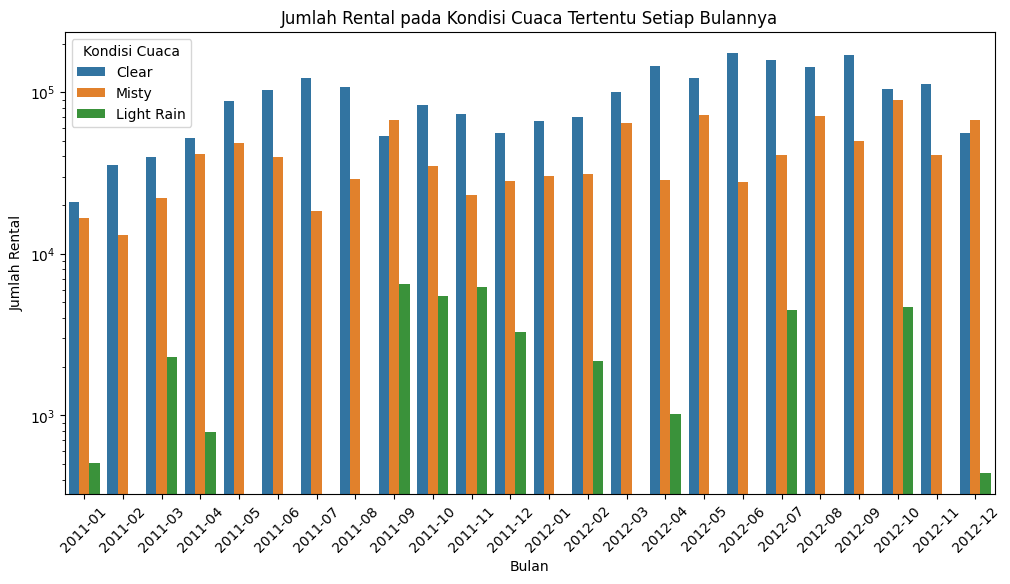

In [18]:

wheather_df = wheather_df.reset_index()
wheather_df['dteday'] = wheather_df['dteday'].dt.strftime('%Y-%m')
plt.figure(figsize=(12, 6))
sns.barplot(x='dteday', y='cnt', hue='weathersit_label', data=wheather_df)
plt.title('Jumlah Rental pada Kondisi Cuaca Tertentu Setiap Bulannya')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental')
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.show()

### Pertanyaan 2:

#### Mengkelompokkan data berdasarkan jam untuk di plotting

In [19]:
df = filtered_hour_df.groupby(by="hr").cnt.sum()

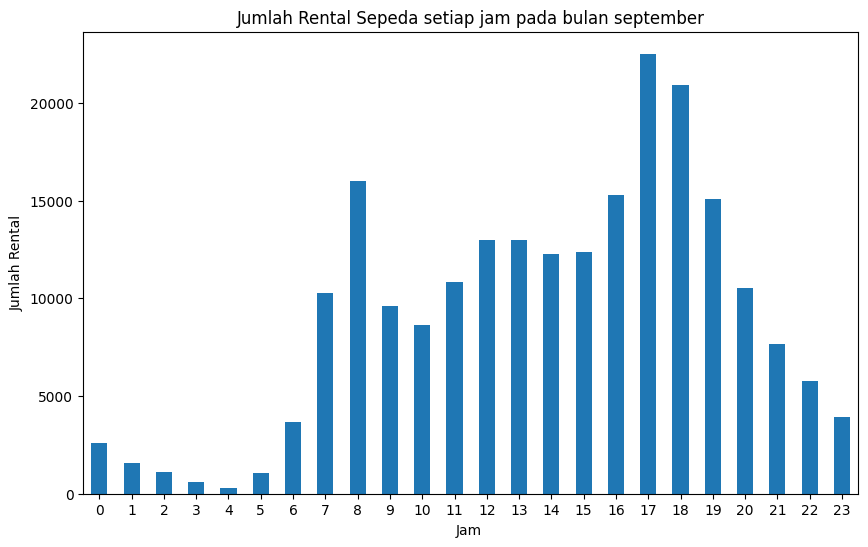

In [20]:
plt.figure(figsize=(10,6))
df.plot(kind='bar')
plt.title('Jumlah Rental Sepeda setiap jam pada bulan september')
plt.xlabel('Jam ')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Rental')
plt.show()

**Insight:**
- Ketika kondisi mulai hujan pengguna rental akan menurun secara signifikan
- jumlah pengguna sepeda berada di puncak pada jam 5 hingga jam 6 sore

## Analisis Lanjutan (Opsional)

## Conclusion

- dari plot yang sudah dibuat, hampir setiap bulan jumlah pengguna sepeda paling banyak ketika cuaca cerah yang kemudian diikuti dengan cuaca berkabut atau berawan dan mengalami penurunan yang signifikan ketika cuaca mulai mulai hujan
- pada plot kedua bisa disimpulkan bahwa ketika memasuki jam 6 akan mengalami peningkatan jumlah pengguna hingga puncak pertama yaitu jam 8 yang bisa menandai rush hour, kemudian akan mengalami penurunan yang tidak terlalu signifikan lalu akan kembali meningkat hingga puncak jumlah pengguna tertinggi pada jam 5 sore yang bisa menandai jam pulang dan akan mengalami penurunan hingga jam 4 pagi.

## Write file 

In [21]:
wheather_file_df = day_df[['dteday','weathersit','cnt','weathersit_label']]
wheather_file_df.to_csv('dashboard/Pertanyaan1.csv', index=False)


# filtered_hour_file_df = filtered_hour_df[['hr','cnt',]]
filtered_hour_df.to_csv('dashboard/Pertanyaan2.csv', index=False)